In [102]:
from scipy.stats import norm
import scipy.stats as sts
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import dates
from functools import reduce

In [93]:
file1='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/Fertility.csv'
file2='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/GDP.PCAP.PPP.csv'
file3='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/Monthly Average House Price.xls'
file4='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/FTSE100.csv'
Fertility=pd.read_csv(file1)
GDP_PPP=pd.read_csv(file2,skiprows=4)
House=pd.read_excel(file3)
FTSE100=pd.read_csv(file4)

## Q1: One-sample two-tailed test
Null Hypothesis:  the women’s energy intake does not deviate systematically from a recommended value of 7725 kJ;
H0: population mean=7725

Alternative Hypothesis: the women’s energy intake deviates systematically from a recommended value of 7725 kJ.
H1: population mean≠7725

In [89]:
energy_intake=[5260,5470,5640,6180,6390,6515,6805,7515, 7515, 8230, 8770]
alpha=0.05
recom_val=7725
n=len(energy_intake)
samp_mean=sum(energy_intake)/n
var=sum((x - samp_mean) ** 2 for x in energy_intake)/(n-1)
samp_std=math.sqrt(var)
SEM=sts.sem(energy_intake)
print('Sample mean: '+ str(samp_mean)+'\nSample standard deviation: '+str(samp_std)+'\nSEM: '+str(SEM))

Sample mean: 6753.636363636364
Sample standard deviation: 1142.1232221373727
SEM: 344.3631083801271


In [90]:
DoF=n-1
print('Degrees of freedom: '+str(DoF))
t_stats=sts.ttest_1samp(energy_intake, popmean=recom_val, alternative='two-sided')
print('t statistic is: '+str(t_stats.statistic),'\np-value is: '+str(t_stats.pvalue))

Degrees of freedom: 10
t statistic is: -2.8207540608310198 
p-value is: 0.018137235176105812


## Q2: Two-sample right-tailed t-test
Null hypothesis: Guinness served in an Irish pub tastes sam as pints served elsewhere. Mean Ireland = Mean Elsewhere

Alternative hypothesis: Guinness in an Irish pub tastes significantly better than pints served elsewhere. Mean Ireland - Mean Elsewhere >0

Set up the mean, sd, and sample size of Ireland as m1,sd1,n1. Elsewhere: m2, sd2, n2

In [93]:
n1=42;n2=61
m1=74;m2=57
sd1=7.4;sd2=7.1
df=n1+n2-2
## method 1
t=(m1-m2)/math.sqrt((sd1**2/n1)+(sd2**2/n2))
p_val=sts.t.sf(abs(t), df)
print('method 1 calulcate manually: '+'t-statistic: '+str(t)+'\np-value: '+str(p_val))
## method 2
t_stats=sts.ttest_ind_from_stats(mean1=m1, std1=sd1, nobs1=n1,
                     mean2=m2, std2=sd2, nobs2=n2,alternative='greater')
print('method 2 use scipy library: '+'t-statistic: '+str(t_stats.statistic)+'\np-value: '+str(t_stats.pvalue))

method 1 calulcate manually: t-statistic: 11.647653131319812
p-value: 1.095517028264447e-20
method 2 use scipy library: t-statistic: 11.73775770205081
p-value: 6.979768077580737e-21


## Q3: Fertility Rate and GDP per capita PPP in 2013

In [94]:
# print(Fertility['Country Name'])
idx=(GDP_PPP['Country Name']=='Not classified') 
print(idx[idx==True])
GDP_PPP=GDP_PPP.drop(110,axis=0)


110    True
Name: Country Name, dtype: bool


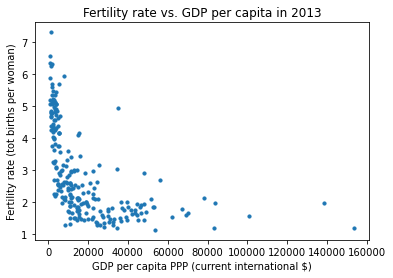

In [97]:
plt.scatter(GDP_PPP['2013'],Fertility['2013'],s=10)
plt.ylabel('Fertility rate (tot births per woman)')
plt.xlabel('GDP per capita PPP (current international $)')
plt.title('Fertility rate vs. GDP per capita in 2013')
plt.show()

In [96]:
corr_coeff=GDP_PPP['2013'].corr(Fertility['2013'])
print('The correlation coefficient is '+str(f'{corr_coeff:.3}'))

The correlation coefficient is -0.279


## Q4: Monthly average house price


In [20]:
House.head()

,Unnamed: 0,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [21]:
#Select the date range
datecol=House.columns[0]
House2 = House[House[datecol].isin(pd.date_range('1/1/1991', '12/1/2016'))]


House2=House2.rename(columns={'Unnamed: 0':'Date'})
House2.head()


,Date,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


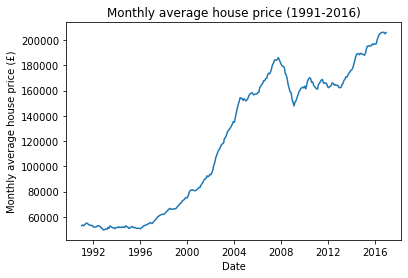

In [5]:
## time series plot
plt.plot(House2.iloc[:,1])
plt.xlabel('Date')
plt.ylabel('Monthly average house price (£)')
plt.title('Monthly average house price (1991-2016)')
plt.show()

In [6]:
## Construct autocorrelation function 
t20=np.arange(1,312)
p=np.array(House2.iloc[:,1])
return_temp = lambda t:(p[t]/p[t-1])-1
return_lst=np.array(list(map(return_temp,t20)))

# Find ACF value
ACF_val1 = 1.96/312**(0.5)
ACF_val2= -1.96/312**(0.5)
ACF_val1

0.11096314934617037

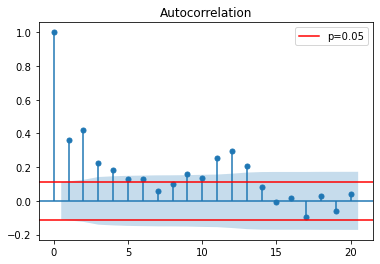

In [7]:
## Plot ACF
fig,ax=plt.subplots()
sm.graphics.tsa.plot_acf(return_lst,lags=20,ax=ax)
ax.axhline(ACF_val1,color='r',label='p=0.05')
ax.axhline(ACF_val2,color='r')
plt.legend()
plt.show()

In [91]:
# Annualized return
annual_return=((return_lst_cums[-1]/return_lst_cums[0])**(1/(312/12))-1)*100
print(f'The annualized return is {annual_return:.2%}')

The annualized return is 2168.17%


## Q5

In [9]:
datecol = FTSE100.columns[0]
FTSE100 = FTSE100.set_index(datecol,drop=False)
FTSE100 = FTSE100.reindex(index=FTSE100.index[::-1])
FTSE100.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1/1/1991,1/1/1991,2143.500000,2182.100098,2052.300049,2170.300049,0,2170.300049
2/1/1991,2/1/1991,2168.500000,2388.399902,2155.600098,2380.899902,0,2380.899902
3/1/1991,3/1/1991,2374.899902,2527.100098,2368.399902,2456.500000,0,2456.500000
4/1/1991,4/1/1991,2456.500000,2555.300049,2438.600098,2486.199951,0,2486.199951
5/1/1991,5/1/1991,2487.399902,2554.899902,2444.600098,2499.500000,0,2499.500000


In [10]:
t20=np.arange(0,312)
FTSE100_temp = np.array(FTSE100['Adj Close'])
return_FTSE_lst=[]
for t in range(len(FTSE100_temp)):
    if t==0:
        return_FTSE=np.nan
    else:
        return_FTSE=(FTSE100_temp[t]/FTSE100_temp[t-1])-1
    return_FTSE_lst.append(return_FTSE)
    
FTSE100_cums = np.cumsum(return_FTSE_lst[1:])


In [15]:
t20=np.arange(0,311)
FTSE100_norms_temp= lambda t:(FTSE100_cums[t]/FTSE100_cums[0])*100
FTSE100_norms = np.array(list(map(FTSE100_norms_temp,t20)))

In [136]:
## Annualized FSTE return
tt=np.arange(1,312)
ann_temp = lambda t:1+return_FTSE_lst[t]
ann_lst=np.array(list(map(ann_temp,tt)))
annual_return_FTSE=(np.prod(ann_lst)**(12/312)-1)
# annual_return_FTSE=((FTSE100_cums[-1]/FTSE100_cums[0])**(1/(312/12))-1)*100
print(f'The annualized FTSE return is {annual_return_FTSE:.3%}')

The annualized FTSE return is 4.463%


In [135]:
## Annualized house return
ann_temp = lambda t:1+return_house_lst[t]
ann_lst=np.array(list(map(ann_temp,tt)))
annual_return_house=(np.prod(ann_lst)**(12/312)-1)
print(f'The annualized house return is {annual_return_house:.3%}')

The annualized house return is 5.354%


In [121]:
return_house_lst=[]
p=np.array(House2.iloc[:,1])
for t in range(len(FTSE100_temp)):
    if t==0:
        return_house=np.nan
    else:
        return_house=(p[t]/p[t-1])-1
    return_house_lst.append(return_house)

return_lst_cums = np.cumsum(return_house_lst[1:])    
t20=np.arange(0,311)

house_norms_temp= lambda t:(return_lst_cums[t]/return_lst_cums[0])*100
house_norms = np.array(list(map(house_norms_temp,t20)))
house_norms2=np.append(np.nan,house_norms)
House2['House_norms']=house_norms2

<ipython-input-79-9a3c6336e223>:6: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(nbins = 10)


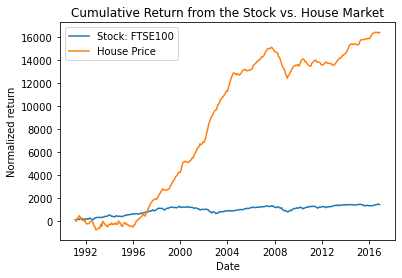

In [79]:
ax=plt.gca()
ax.plot(House2.iloc[1:,0], FTSE100_norms,label='Stock: FTSE100')
ax.plot(House2.iloc[:,0],House2['House_norms'],label='House Price')
plt.xlabel('Date')
plt.ylabel('Normalized return')
plt.locator_params(nbins = 10)
plt.title('Cumulative Return from the Stock vs. House Market')
ax.legend()
plt.show()